In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['figure.figsize'] = [4.0, 2.0]
plt.rcParams.update({'font.size': 8})

sns.set_context("notebook", font_scale=0.5, rc={"lines.linewidth": 1})

In [3]:
df = pd.read_excel('Online Retail.xlsx')

In [4]:
df.shape

(541909, 8)

In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#Cleansing


In [8]:
# Drop Description, CustomerID, InvoiceNo and StockCode columns
df.drop(['Description', 'InvoiceNo', 'StockCode', 'InvoiceDate', 'CustomerID'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Quantity   541909 non-null  int64  
 1   UnitPrice  541909 non-null  float64
 2   Country    541909 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 12.4+ MB


In [9]:
# Drop rows with negative Quantity
df = df[df['Quantity'] > 0]

In [10]:
# Drop rows with negative UnitPrice
df = df[df['UnitPrice'] > 0]

In [11]:
# Remove outliers in Quantity
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1 
df = df[(df['Quantity'] >= (Q1 - 1.5 * IQR)) & (df['Quantity'] <= (Q3 + 1.5 * IQR))] 

In [12]:
df.describe()

,Quantity,UnitPrice
count,473741.000000,473741.000000
mean,4.716636,4.216455
std,4.441115,37.965381
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.460000
75%,6.000000,4.150000
max,23.000000,13541.330000


In [13]:
#Feature Engineering

In [14]:
# Create new TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [ ]:
#EDA

<Axes: >

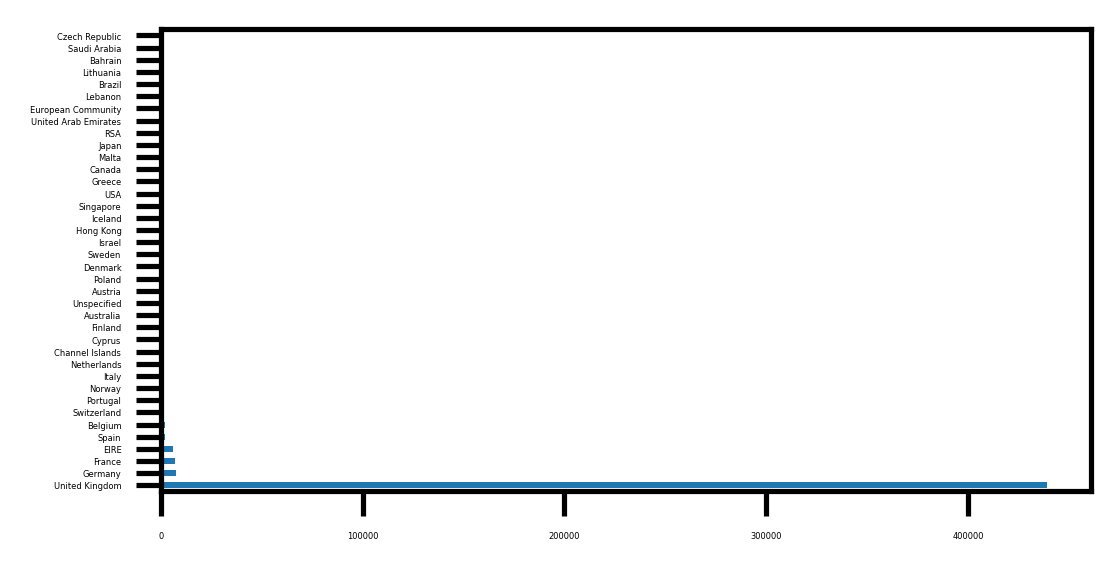

In [15]:
# Frequency of each country
df['Country'].value_counts().plot(kind='barh', fontsize=2)

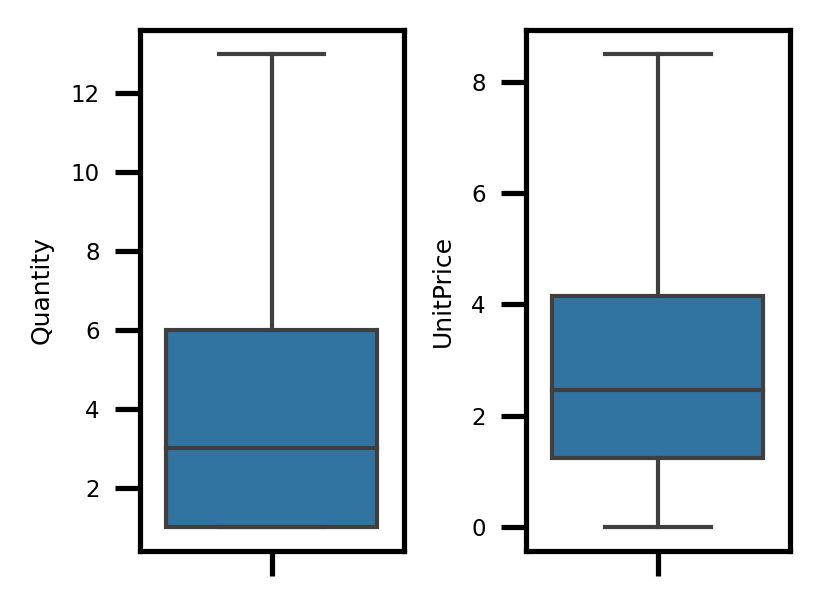

In [16]:
# Boxplot of Quantity and UnitPrice
plt.subplot(1, 3, 1)
sns.boxplot(y='Quantity', data=df, showfliers=False)

plt.subplot(1, 3, 2)
sns.boxplot(y='UnitPrice', data=df, showfliers=False)

plt.tight_layout()

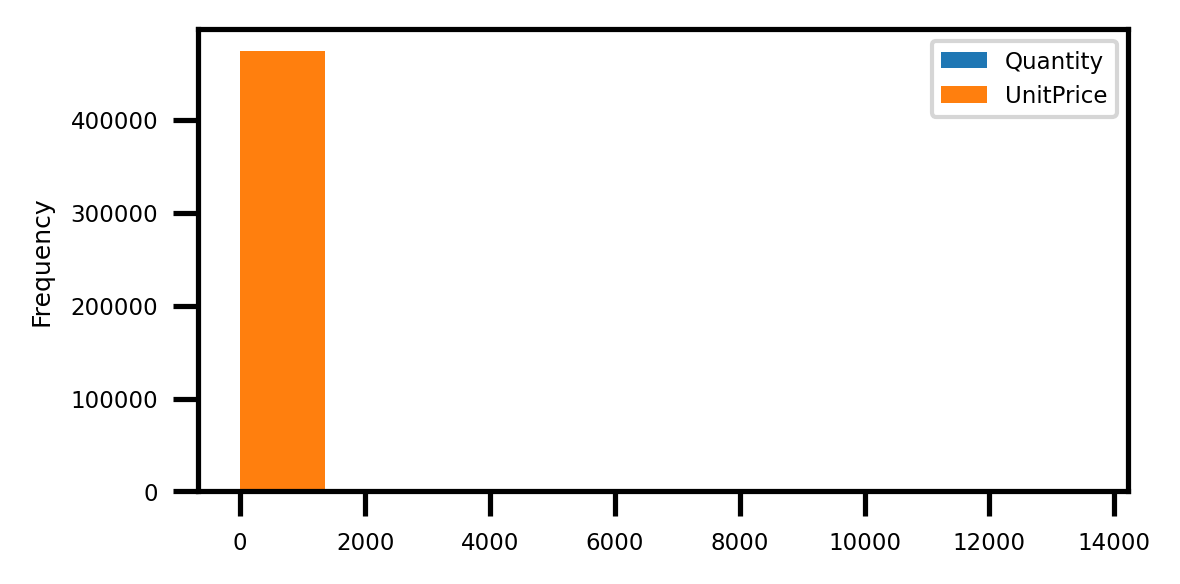

In [17]:
# Histogram of Quantity and UnitPrice
df['Quantity'].plot(kind='hist', bins=10)
df['UnitPrice'].plot(kind='hist', bins=10)

plt.legend(['Quantity', 'UnitPrice'])

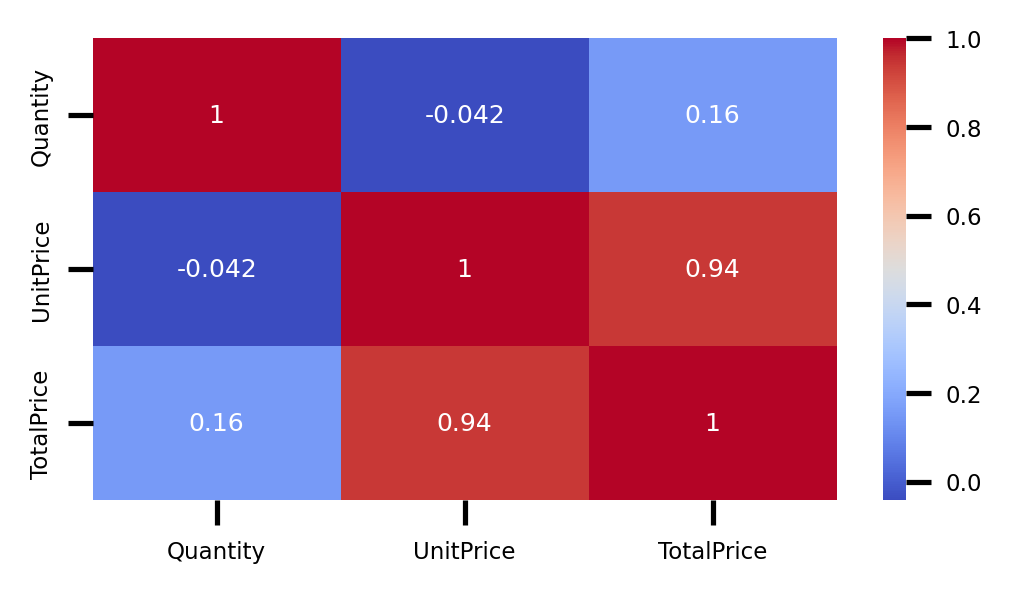

In [18]:
# Correlation matrix
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#Preprocessing

In [ ]:
#Spillting

In [19]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
#Encoding

In [20]:
# Encode the Country column
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train['Country'] = encoder.fit_transform(train['Country'])
test['Country'] = encoder.transform(test['Country'])

In [ ]:
#Modeling

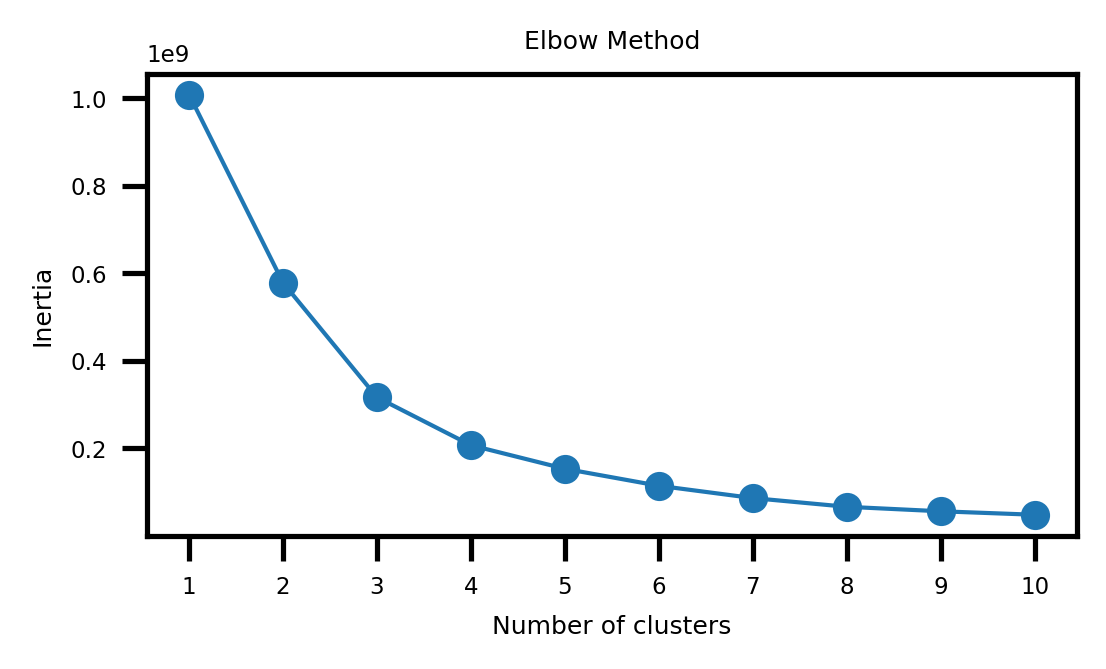

In [21]:
# K-Means Clustering
from sklearn.cluster import KMeans


# Find the best number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(train)
    inertia.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()


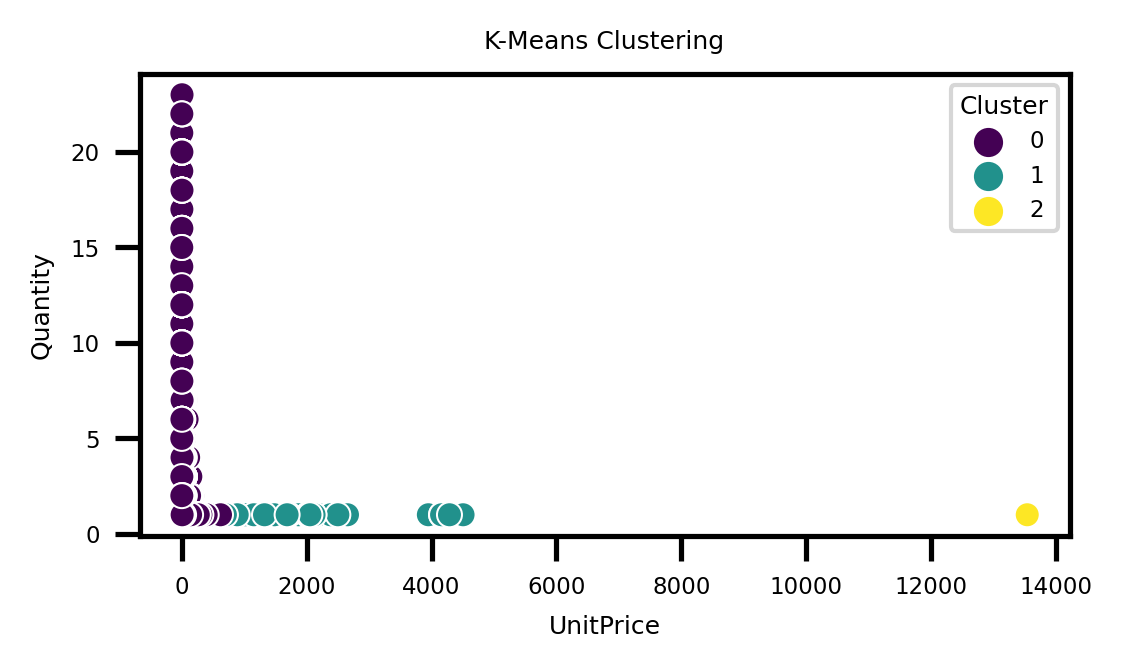

In [22]:
# Fit the model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
train['Cluster'] = kmeans.fit_predict(train)

# Visualize the clusters
sns.scatterplot(x='UnitPrice', y='Quantity', hue='Cluster', data=train, palette='viridis')
plt.title('K-Means Clustering')
plt.show()